In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load and Inspect Data

In [3]:
# Import data 
df_CR = pd.read_csv("conversion_data.csv")

In [4]:
# Check data
df_CR.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [5]:
# Check for missing values 
df_CR.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [6]:
# Check the data structure:
df_CR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [7]:
# Get summary statistics:
df_CR.describe(include="all")

,country,age,new_user,source,total_pages_visited,converted
count,316200,316200.000000,316200.000000,316200,316200.000000,316200.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,178092,NaN,NaN,155040,NaN,NaN
mean,NaN,30.569858,0.685465,NaN,4.872966,0.032258
std,NaN,8.271802,0.464331,NaN,3.341104,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


### Some observations:
#### 1. The convension rate is around 3%.
#### 2. The maximum age is 123, which is weird. We need more investigation. 
#### 3. This site is probably a US site, based on the high frequency of "US" in variable *country*. 
#### 4. User base is pretty young with average age of around 30. 

### Handle age outliers

In [8]:
# Investigate the amount of age outliers. Here, we define outliers as those having age larger than 100:
df_CR.loc[df_CR['age']>100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


Since there are only two outliers and the total number of observations is 316200, it seems reasonable to just remove these two.

In [9]:
df_CR_new = df_CR.loc[df_CR['age']<=100]

In [10]:
df_CR_new.age.describe()

count    316198.000000
mean         30.569311
std           8.268958
min          17.000000
25%          24.000000
50%          30.000000
75%          36.000000
max          79.000000
Name: age, dtype: float64

### Inspect *country* and conversion

/Users/shuting/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


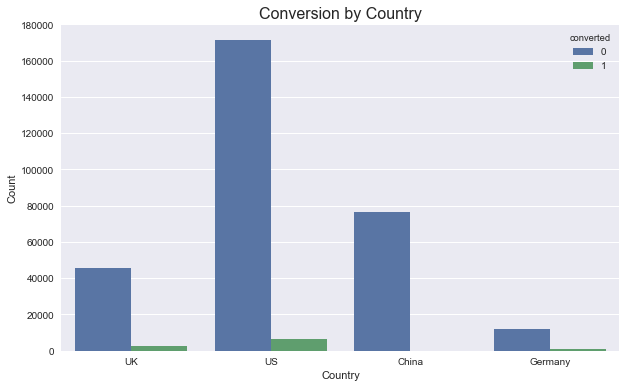

In [11]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x='country', hue='converted', data=df_CR_new)
ax.set_title('Conversion by Country', fontsize=16)
ax.set_xlabel('Country')
ax.set_ylabel('Count')
plt.show()

/Users/shuting/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/Users/shuting/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


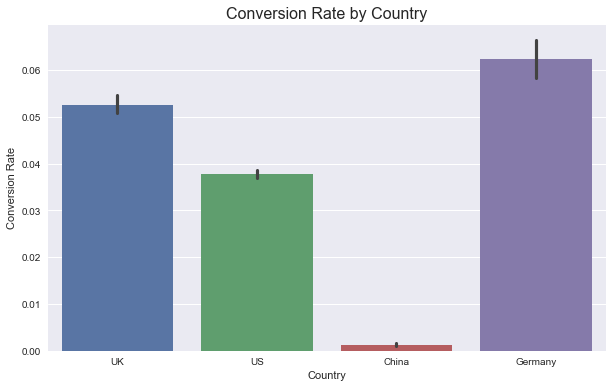

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x='country', y='converted', data=df_CR_new)
ax.set_title('Conversion Rate by Country', fontsize=16)
ax.set_xlabel('Country')
ax.set_ylabel('Conversion Rate')
plt.show()

### Inspect *age* and converstion 

/Users/shuting/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


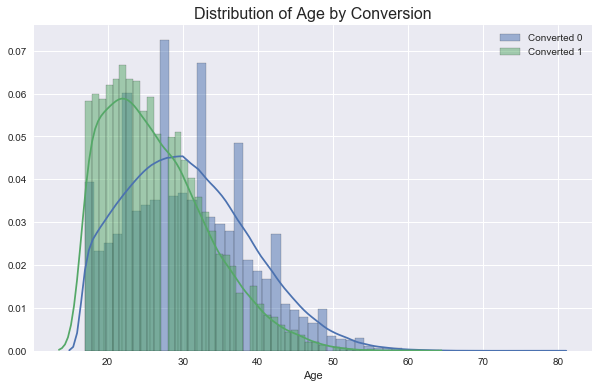

In [13]:
# Plot the distribution of age by Conversion 
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.5}

fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(df_CR_new[df_CR_new['converted'] == 0]['age'], label='Converted 0', hist_kws=hist_kws)
sns.distplot(df_CR_new[df_CR_new['converted'] == 1]['age'], label='Converted 1', hist_kws=hist_kws)
ax.set_title('Distribution of Age by Conversion', fontsize=16)
ax.set_xlabel('Age')
ax.legend()
plt.show()

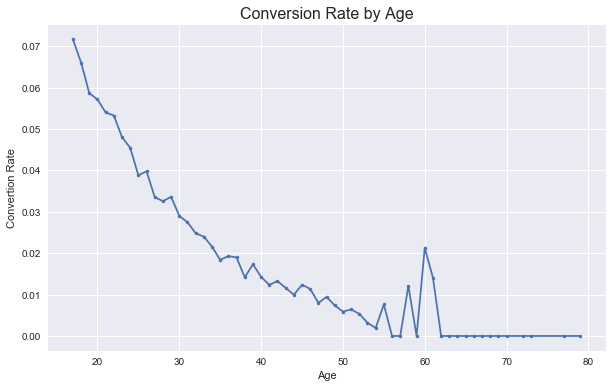

In [14]:
# Conversion rate by Age
grouped = df_CR_new[['age', 'converted']].groupby('age').mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(grouped['age'], grouped['converted'], '.-')
plt.title('Conversion Rate by Age', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Convertion Rate')
plt.show()

### Inspect *total_pages_visited* and conversion

/Users/shuting/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


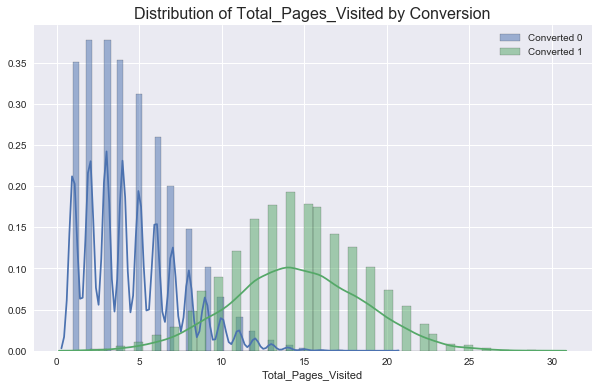

In [15]:
# Plot the distribution of total_pages_visited by Conversion 
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.5}

fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(df_CR_new[df_CR_new['converted'] == 0]['total_pages_visited'], label='Converted 0', hist_kws=hist_kws)
sns.distplot(df_CR_new[df_CR_new['converted'] == 1]['total_pages_visited'], label='Converted 1', hist_kws=hist_kws)
ax.set_title('Distribution of Total_Pages_Visited by Conversion', fontsize=16)
ax.set_xlabel('Total_Pages_Visited')
ax.legend()
plt.show()

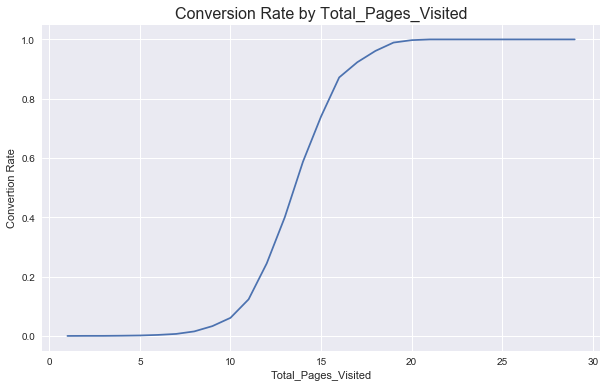

In [16]:
# Conversion rate by total_pages_visited
grouped = df_CR_new[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(grouped['total_pages_visited'], grouped['converted'])
plt.title('Conversion Rate by Total_Pages_Visited', fontsize=16)
plt.xlabel('Total_Pages_Visited')
plt.ylabel('Convertion Rate')
plt.show()

### Inspect *source* and conversion

/Users/shuting/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


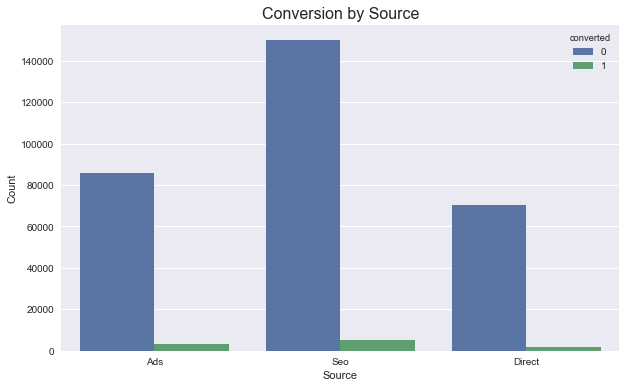

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x='source', hue='converted', data=df_CR_new)
ax.set_title('Conversion by Source', fontsize=16)
ax.set_xlabel('Source')
ax.set_ylabel('Count')
plt.show()

/Users/shuting/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/Users/shuting/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


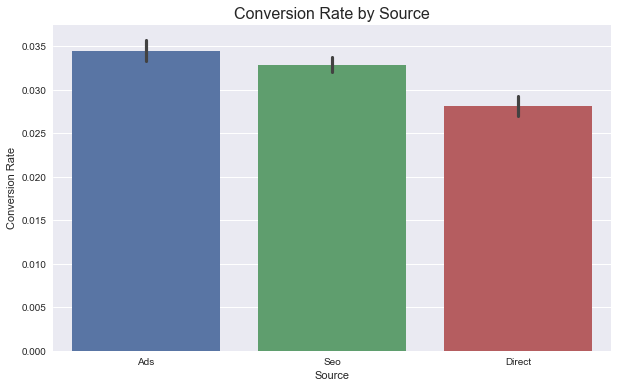

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x='source', y='converted', data=df_CR_new)
ax.set_title('Conversion Rate by Source', fontsize=16)
ax.set_xlabel('Source')
ax.set_ylabel('Conversion Rate')
plt.show()

### Data Preprocessing 

Convert categorical variables *country* and *source* into dummies:

In [19]:
X = df_CR_new.loc[:,('country', 'age', 'new_user', 'source', 'total_pages_visited')]
X = pd.get_dummies(X)

In [20]:
# Check new data 
X.head()

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,1,0,1,0,0
1,23,1,5,0,0,0,1,0,0,1
2,28,1,4,0,0,0,1,0,0,1
3,39,1,5,1,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,0,1


In [21]:
# Conversion rate 
print(df_CR_new['converted'].mean())

0.03225194340255157


Since the conversion rate is very imbalanced, we should not use plain 'accuracy' as the metric to judge a classifier is good or not. Hence, we need to split the whole dataset into training dataset and test dataset.

##### Note: What is the imbalanced classification problem?
This is a scenario where the number of observations belonging to one class is significantly lower than those belonging to the other classes.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

/Users/shuting/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
y = df_CR_new['converted']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3) # Also, could try 1/3 test, 2/3 training 
# If the data were too small, I would cross-validate. 

In [24]:
ytrain.mean(), ytest.mean() 

(0.031887881882008515, 0.03310141260805397)

### Machine Learning - Logistic Regression 

In [25]:
# Run logit regression on training data 
LogReg = LogisticRegression()
LogReg.fit(Xtrain, ytrain)
# The estimates 
LogReg.intercept_

array([-4.78420825])

In [26]:
LogReg.coef_

array([[-0.07619771, -1.7541179 ,  0.74879037, -3.84162522, -0.04083731,
        -0.27233855, -0.62940717, -1.51144546, -1.72181395, -1.55094883]])

In [27]:
# Create predicted values for the test set
from sklearn.metrics import confusion_matrix, classification_report
ypred = LogReg.predict(Xtest)
# Confusion matrix: tells us Type I and Type II errors. 
confusion_matrix = confusion_matrix(ytest, ypred)
confusion_matrix

array([[91384,   336],
       [  988,  2152]])

In [28]:
# Classification report 
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     91720
          1       0.86      0.69      0.76      3140

avg / total       0.99      0.99      0.99     94860



In [29]:
LogReg.score(Xtest, ytest)

0.9860425890786422

In [30]:
LogReg.score(Xtrain, ytrain)

0.9861885442174412

In [31]:
1 - ytest.mean()

0.966898587391946

Since this is an imbalanced classification problem, if we treat every record as 'NOT Converted', we can still get 96.69% accuracy (1-ytest.mean()). Since our LR model produces an accuracy as 98.60% on test dataset, we can say that  it is a suitable model.

##### Feature Importances
To find feature importances, I would like to consider the magnitude of its coefficient times the standard deviation of the corresponding parameter in the data. 

In [38]:
print(np.std(Xtrain)*LogReg.coef_[0])

age                   -0.631105
new_user              -0.814489
total_pages_visited    2.498248
country_China         -1.645975
country_Germany       -0.008127
country_UK            -0.098085
country_US            -0.312176
source_Ads            -0.679346
source_Direct         -0.722641
source_Seo            -0.775343
dtype: float64


In [39]:
feat_importances = pd.DataFrame({"name":Xtrain.columns,"coef":LogReg.coef_[0]})
feat_importances = feat_importances[['name','coef']]# reorder the columns
feat_importances['importances'] = np.abs( feat_importances['coef'] )
feat_importances.sort_values(by="importances",inplace=True,ascending=False)
feat_importances

,name,coef,importances
3,country_China,-3.841625,3.841625
1,new_user,-1.754118,1.754118
8,source_Direct,-1.721814,1.721814
9,source_Seo,-1.550949,1.550949
7,source_Ads,-1.511445,1.511445
2,total_pages_visited,0.748790,0.748790
6,country_US,-0.629407,0.629407
5,country_UK,-0.272339,0.272339
0,age,-0.076198,0.076198
4,country_Germany,-0.040837,0.040837
